In [2]:
# importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# Brief Introduction to Monte Carlo Integration

From calulus, we know that the average of a function $f$, over a given interval, is defined as:

$$ \overline{f}= \frac{1}{b - a} \int_{a}^{b} f(t) dt $$

However, for a computation, we are unable to deal with an infinite number of calculations, so we will need to discretise this average calculation as:

$$ \overline{f} = \frac{1}{N} \sum_{i = 1}^{N} f(t_i) $$

and Monte Carlo integration is about calculating the integral by using the following:

$$ (b - a) \times \frac{1}{N} \sum_{i = 1}^{N} f(t_i) \approx \int_{a}^{b} f(t) dt $$

For the first example, we are going to integrate $ f(t) = \cos{t} $ from $0$ to $\frac{\pi}{2} $, and we know that the answer should equal 1

In [56]:
# the first step is to initialise some parameters

# the limits of our integration
b = np.pi / 2
a = 0

# the number of points we want to use
N = 5000

In [57]:
# getting our list of random values of t
t_random = scipy.random.uniform(a,b,N)

In [58]:
# defining the function
def fn(x):
    return np.cos(x)

In [59]:
# doing the summation step
sum(fn(t_random))/N * (b - a)

0.9950641961084514

As we can see that the above answer is not too far off from the real answer. Now, what if repeated the above process for a large number of times and made a histogram of the calculations

In [67]:
def monte_carlo_integration(a,b,N,func):
    
    results = np.array([])
    
    for i in range(N):
        # getting a list of the random t values
        t_rand = scipy.random.uniform(a,b,N)

        # list of evaluating the function at those points
        f_sum = sum(func(t_rand))

        # finishing the calculation
        result = f_sum / N * (b - a)
        
        new_results = np.append(results,result)
        results = new_results
    
    #print(results)
    
    # getting ready to plot the function
    plt.xlabel("Areas")
    plt.ylabel("Frequency")
    plt.hist(results,bins = 20, ec = 'black')
    plt.grid()
    plt.show()

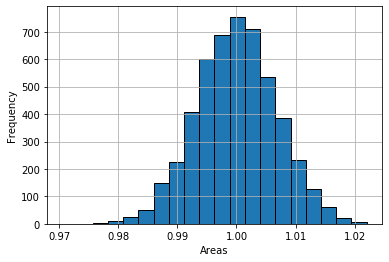

In [68]:
monte_carlo_integration(a,b,N,fn)

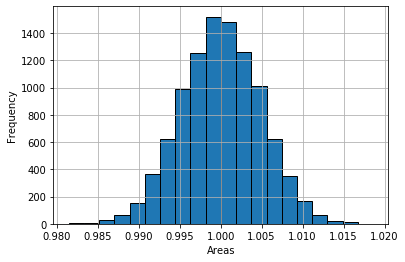

In [69]:
monte_carlo_integration(a,b,10000,fn)

As you can see from the above distributions, as we increase the number of iterations, the distribution gets tighter and thinner. As we increase N ad infinitum, we would expect the shape of the distribution to approach a Dirac-Delta function $ \delta (t - 1) $  - centred around 1

You could increase $N$ further to test this, but please note that it will take longer to run so be patient - this algorithm has a time complexity $ O (N ^ 2 ) $